In [137]:
import numpy as np
import pandas as pd
import pycountry
import plotly.express as px
import plotly.graph_objects as go
from collections import defaultdict
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

def normalize(x):
    x_ = x - np.min(x)
    x__ = x_ / np.std(x_)
    return x

# 1. Working Conditions (Hours + Productivity) OK!
# 2. Econimic Development (GDP + Wage) Not Relevant
# 3. Social Welfare (Welfare) OK!
# 4. Climate (Latitude + Sunny Days) OK !

In [138]:
source = px.data.gapminder()
source = source.groupby(['country','iso_alpha'],as_index=False).agg({'iso_num': 'mean'})
country_code = defaultdict(str)
for i in source.iterrows():
    country_code[i[1][0]] = i[1][1]
    
country_code['Antigua and Barbuda'] = 'ATG'
country_code['Bahamas'] = 'BHS'
country_code['Barbados'] = 'BRB'
country_code['Belize'] = 'BLZ'
country_code['Luxembourg'] = 'LUX'
country_code['Malta'] = 'MLT'
country_code['Republic of Korea'] = 'KOR'
country_code['Saint Lucia'] = 'LCA'
country_code['Saint Vincent and Grenadines'] = 'VCT'
country_code['Seychelles'] = 'SYC'
country_code['Suriname'] = 'SUR'
country_code['Turkmenistan'] = 'TKM'
country_code['Ukraine'] = 'UKR'

countries = defaultdict(str)
for country in pycountry.countries:
    countries[country.name] = country.alpha_3
    
countries['Russia'] = 'RUS'
countries['Ivory Coast'] = 'CIV'
countries['South Korea'] = 'KOR'
countries['Cape Verde'] = 'CPV'
countries['Moldova'] = 'MDA'
countries['Bolivia'] = 'BOL'
countries['F.S. Micronesia'] = 'FSM'
countries['North Korea'] = 'PRK'
countries['Slovak Republic'] = 'SVK'
countries['Czech Republic'] = 'CZE'
countries['Tanzania'] = 'TZA'
countries['Laos'] = 'LAO'
countries['Vietnam'] = 'VNM'
countries['East Timor'] = 'TMP'
countries['Brunei'] = 'BRU'
countries['Iran'] = 'IRN'
countries['Venezuela'] = 'VEN'
countries['São Tomé and Príncipe'] = 'STP'
countries['Syria'] = 'SYR'
countries['DR Congo'] = 'COD'

OECD = ['MEX', 'KOR', 'GRC', 'IND', 'CHL', 'RUS', 'POL', 'LVA', 'ISR', 'ISL', 'IRL', 'EST', 'PRT', 'USA', 'CZE', 'HUN', 'NZL', 'SVK', 'ITA', 'JPN', 'CAN', 'ESP', 'SVN', 'GBR', 'AUS', 'FIN', 'SWE', 'AUT', 'CHE', 'BEL', 'LUX', 'FRA', 'NLD', 'NOR', 'DNK', 'DEU']


In [139]:
data_pic0 = pd.read_excel('rate.xlsx').values
data1 = []
data2 = []

for i in data_pic0[:, 1]:
    if i.endswith('[a]\xa0(more info)'):
        data1.append(i[:-15].strip())
    elif i.endswith('(more info)'):
        data1.append(i[:-12].strip())
    elif i.endswith('[a]'):
        data1.append(i[:-3].strip())
    else:
        data1.append(i.strip())
        
for i in data1:
    data2.append(countries[i])
        
data_pic0[:, 1] = data1
data_pic0[:, 2] = data2

data_pic0 = pd.DataFrame(data=data_pic0, columns=['Rank', 'Country', 'Code', 'Rate'])

Pearson Correlation between Annual Working Hours and Suicide Rate is: (0.14516058265806767, 0.3982710842654529)


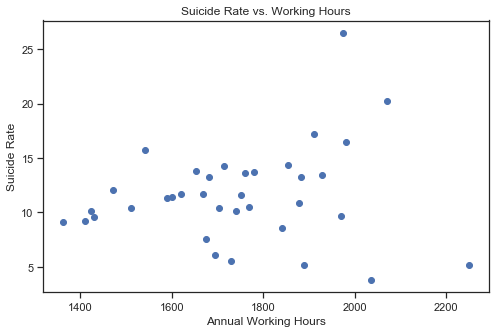

Pearson Correlation between Productivity and Suicide Rate is: (-0.37520165360043756, 0.024142814766648927)


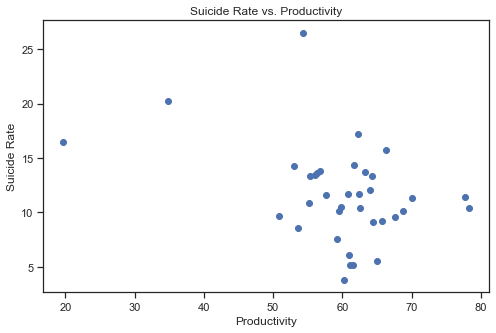

Pearson Correlation between Hours + Productivity and Suicide Rate is: (0.3850032661246324, 0.02041247510465429)


In [140]:
data_pic1 = pd.read_excel('hours.xlsx').values
data1 = []
data2 = []
data3 = []

for i in data_pic1[:, 1]:
    data1.append(i.strip())
for i in data1:
    data2.append(countries[i])
for i in data2:
    data3.append(data_pic0[data_pic0['Code']==i]['Rate'].values[0])
    
data_pic1[:, 1] = data1
data_pic1[:, 2] = data2
data_pic1[:, 4] = data3

data_pic1 = pd.DataFrame(data=data_pic1, columns=['Rank', 'Country', 'Code', 'Hours', 'Rate'])

data_pic2 = pd.read_excel('prod.xlsx')
data_pic2 = data_pic2.groupby(['Code'],as_index=False).agg({'Productivity': 'mean'})
data_pic2 = data_pic2.values
productivity = defaultdict(float)
for i in range(len(data_pic2)):
    productivity[data_pic2[i, 0]] = data_pic2[i, 1]
    
data4 = []
for i in data_pic1['Code']:
    data4.append(productivity[i])
try:
    data_pic1.insert(4, 'Productivity', data4)
except:
    print('Insert done before!')

data_pic2 = data_pic1 # very important
data_pic2.iloc[3, 4] = 19.70 # India, not a good way to modify data

sns.set(style="ticks")
sns.set_context({"figure.figsize": (8, 5)})
    
correlation = stats.pearsonr(normalize(data_pic2['Hours']), normalize(data_pic2['Rate']))
print('Pearson Correlation between Annual Working Hours and Suicide Rate is:', correlation)
plt.plot(data_pic2['Hours'], data_pic2['Rate'], 'o')
plt.xlabel('Annual Working Hours')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate vs. Working Hours')
plt.show()
    
correlation = stats.pearsonr(normalize(data_pic2['Productivity']), normalize(data_pic2['Rate']))
print('Pearson Correlation between Productivity and Suicide Rate is:', correlation)
plt.plot(data_pic2['Productivity'], data_pic2['Rate'], 'o')
plt.xlabel('Productivity')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate vs. Productivity')
plt.show()

reg = linear_model.LinearRegression()
reg.fit(data_pic2[['Hours', 'Productivity']], data_pic2['Rate'])
y = reg.predict(data_pic2[['Hours', 'Productivity']])
correlation1 = stats.pearsonr(normalize(y), normalize(data_pic2['Rate']))
print('Pearson Correlation between Hours + Productivity and Suicide Rate is:', correlation1)

Insert done before!
Insert done before!
Pearson Correlation between GDP per Capita and Suicide Rate is: (-0.1488594315420898, 0.386228247923836)


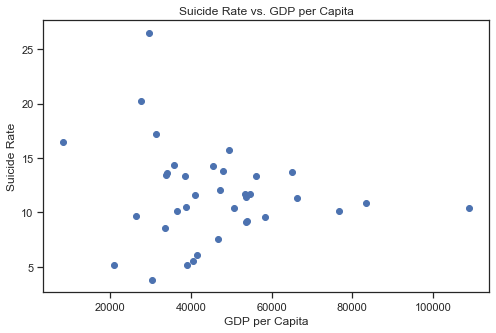

Pearson Correlation between Annual Wage and Suicide Rate is: (-0.144572856513576, 0.40020430485343866)


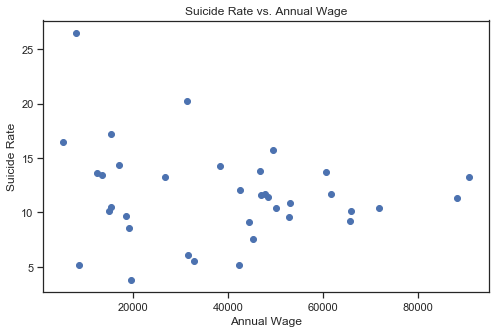

Pearson Correlation between GDP + Unemployment and Suicide Rate is: (0.15523818630562508, 0.3659662022706842)


In [142]:
data_pic3 = pd.read_excel('wage.xlsx').values
wage = defaultdict(float)
for i in range(len(data_pic3)):
    wage[countries[data_pic3[i, 1].strip()]] = data_pic3[i, 2]

data1 = []
for i in data_pic2['Code']:
    data1.append(wage[i])
try:
    data_pic2.insert(5, 'Wage', data1)
except:
    print('Insert done before!')
    
data_pic4 = pd.read_excel('gdp.xlsx').values
gdp_ppp = defaultdict(float)
for i in range(len(data_pic4)):
    gdp_ppp[countries[data_pic4[i, 1].strip()]] = data_pic4[i, 2]
    
data2 = []
for i in data_pic2['Code']:
    data2.append(gdp_ppp[i])
try:
    data_pic2.insert(6, 'GDP', data2)
except:
    print('Insert done before!')

data_pic2.iloc[3, 5] = 5350 # Inida
data_pic2.iloc[5, 5] = 8040 # Russia
data_pic2.iloc[1, 6] = 27600 # Korea

    
sns.set(style="ticks")
sns.set_context({"figure.figsize": (8, 5)})
    
correlation = stats.pearsonr(normalize(data_pic2['GDP']), normalize(data_pic2['Rate']))
print('Pearson Correlation between GDP per Capita and Suicide Rate is:', correlation)
plt.plot(data_pic2['GDP'], data_pic2['Rate'], 'o')
plt.xlabel('GDP per Capita')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate vs. GDP per Capita')
plt.show()

correlation = stats.pearsonr(normalize(data_pic2['Wage']), normalize(data_pic2['Rate']))
print('Pearson Correlation between Annual Wage and Suicide Rate is:', correlation)
plt.plot(data_pic2['Wage'], data_pic2['Rate'], 'o')
plt.xlabel('Annual Wage')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate vs. Annual Wage')
plt.show()

reg = linear_model.LinearRegression()
reg.fit(data_pic2[['GDP', 'Wage']], data_pic2['Rate'])
y = reg.predict(data_pic2[['GDP', 'Wage']])
correlation1 = stats.pearsonr(normalize(y), normalize(data_pic2['Rate']))
print('Pearson Correlation between GDP + Unemployment and Suicide Rate is:', correlation1)

Pearson Correlation between Social Welfare and Suicide Rate is: (-0.3824619472512035, 0.021330186169802673)


Text(0.5, 1.0, 'Suicide Rate vs. Social Welfare as Percentage in GDP')

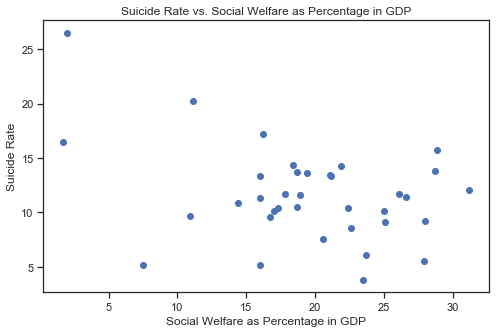

In [143]:
data_pic5 = pd.read_excel('welfare.xlsx').values
welfare = defaultdict(float)
for i in range(len(data_pic5)):
    welfare[countries[data_pic5[i, 1].strip()]] = data_pic5[i, 2]
    
data1 = []
for i in data_pic2['Code']:
    data1.append(welfare[i])
try:
    data_pic2.insert(7, 'Welfare', data1)
except:
    print('Insert done before!')
    
data_pic2.iloc[3, 7] = 1.7 # India
data_pic2.iloc[5, 7] = 2.0 # Russia
    
sns.set(style="ticks")
sns.set_context({"figure.figsize": (8, 5)})
    
correlation = stats.pearsonr(normalize(data_pic2['Welfare']), normalize(data_pic2['Rate']))
print('Pearson Correlation between Social Welfare and Suicide Rate is:', correlation)
plt.plot(data_pic2['Welfare'], data_pic2['Rate'], 'o')
plt.xlabel('Social Welfare as Percentage in GDP')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate vs. Social Welfare as Percentage in GDP')

Pearson Correlation between Latitude and Suicide Rate is: (0.29399907361949684, 0.08178239641399117)


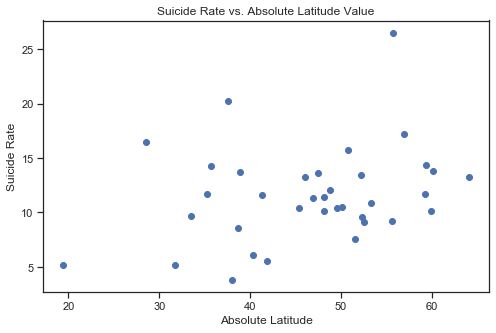

Pearson Correlation between Sunny Days and Suicide Rate is: (-0.3345050722757437, 0.04614577372648517)


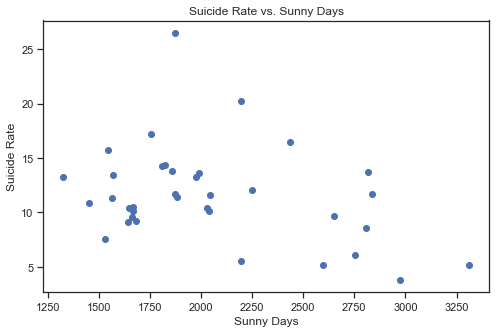

Pearson Correlation between Latitude + Sunny Days and Suicide Rate is: (0.3404318985981904, 0.04219014098251839)


In [144]:
data_pic6 = pd.read_excel('latitude.xlsx').values
latitude = defaultdict(float)
for i in range(len(data_pic6)):
    latitude[countries[data_pic6[i, 1].strip()]] = np.abs(data_pic6[i, 2])
    
data1 = []
for i in data_pic2['Code']:
    data1.append(latitude[i])

try:
    data_pic2.insert(8, 'Latitude', data1)
except:
    print('Insert done before!')
    
data_pic7 = pd.read_excel('sunshine.xlsx')
data_pic7 = data_pic7.groupby(['Country'],as_index=False).agg({'Sunshine': 'mean'})
data_pic7 = data_pic7.values
sunshine = defaultdict(float)
for i in range(len(data_pic7)):
    sunshine[countries[data_pic7[i, 0].strip()]] = np.abs(data_pic7[i, 1])

data2 = []
for i in data_pic2['Code']:
    data2.append(sunshine[i])

try:
    data_pic2.insert(9, 'Sunshine', data2)
except:
    print('Insert done before!')
    
#drops = data_pic2[data_pic2['Sunshine']==0].index
#data_pic2 = data_pic2.drop(drops) # delete rows without sunshine data
data_pic2.iloc[23, 8] = 51.5500 # United Kindom
data_pic2.iloc[5, 9] = 1872.78 # Russia
data_pic2.iloc[30, 9] = 1647.75 # Luxembourg

sns.set(style="ticks")
sns.set_context({"figure.figsize": (8, 5)})

correlation = stats.pearsonr(normalize(data_pic2['Latitude']), normalize(data_pic2['Rate']))
print('Pearson Correlation between Latitude and Suicide Rate is:', correlation)
plt.plot(data_pic2['Latitude'], data_pic2['Rate'], 'o')
plt.xlabel('Absolute Latitude')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate vs. Absolute Latitude Value')
plt.show()

correlation = stats.pearsonr(normalize(data_pic2['Sunshine']), normalize(data_pic2['Rate']))
print('Pearson Correlation between Sunny Days and Suicide Rate is:', correlation)
plt.plot(data_pic2['Sunshine'], data_pic2['Rate'], 'o')
plt.xlabel('Sunny Days')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate vs. Sunny Days')
plt.show()

reg = linear_model.LinearRegression()
reg.fit(data_pic2[['Latitude', 'Sunshine']], data_pic2['Rate'])
y = reg.predict(data_pic2[['Latitude', 'Sunshine']])
correlation1 = stats.pearsonr(normalize(y), normalize(data_pic2['Rate']))
print('Pearson Correlation between Latitude + Sunny Days and Suicide Rate is:', correlation1)

In [145]:
data_pic2.reset_index(drop=True, inplace=True)
data_pic2

,Rank,Country,Code,Hours,Productivity,Wage,GDP,Welfare,Latitude,Sunshine,Rate
0,1,Mexico,MEX,2250,61.564627,8593.0,20868.0,7.5,19.43,2596.250000,5.2
1,2,South Korea,KOR,2070,34.768876,31390.0,27600.0,11.1,37.55,2196.650000,20.2
2,3,Greece,GRC,2035,60.203705,19542.0,30252.0,23.5,37.97,2975.000000,3.8
3,4,India,IND,1980,19.700000,5350.0,8378.0,1.7,28.60,2434.150000,16.5
4,5,Chile,CHL,1970,50.924870,18645.0,26317.0,10.9,33.45,2648.540000,9.7
5,6,Russia,RUS,1974,54.287952,8040.0,29642.0,2.0,55.75,1872.780000,26.5
6,7,Poland,POL,1928,56.026313,13431.0,33891.0,21.1,52.23,1571.000000,13.4
7,8,Latvia,LVA,1910,62.291633,15412.0,31402.0,16.2,56.93,1754.000000,17.2
8,9,Israel,ISR,1889,61.152523,42378.0,39121.0,16.0,31.78,3311.000000,5.2
9,10,Iceland,ISL,1883,55.292252,90662.0,56066.0,16.0,64.13,1326.000000,13.3


Pearson Correlation between Latitude + Sunny Days and Suicide Rate is: (0.6803717530721372, 4.989465714302713e-06)


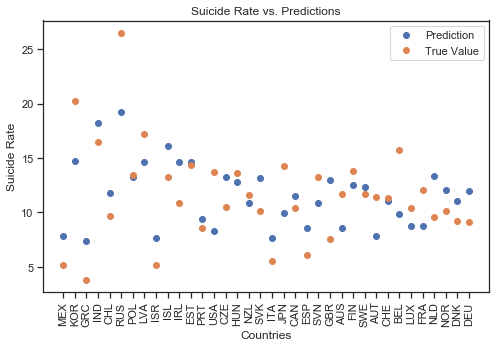

In [146]:
factors = ['Hours', 'Productivity', 'Wage', 'GDP', 'Welfare', 'Latitude', 'Sunshine']
X = np.array(data_pic2[factors])
y = np.array(data_pic2['Rate'])
losses = []

reg = linear_model.LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

sns.set(style="ticks")
sns.set_context({"figure.figsize": (8, 5)})

correlation1 = stats.pearsonr(normalize(y_pred), normalize(y))
print('Pearson Correlation between Latitude + Sunny Days and Suicide Rate is:', correlation1)
plt.plot(data_pic2['Code'], y_pred, 'o', label='Prediction')
plt.plot(data_pic2['Code'], y, 'o', label='True Value')
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate vs. Predictions')
plt.legend()
plt.show()

In [147]:
data = pd.read_csv('master.csv')
data = data[data['year'] < 2015]
df0 = data[['year', 'suicides_no']]
df0 = df0.groupby(['year'], as_index=False).agg({'suicides_no': 'sum'})
df1 = data[['year', 'sex', 'suicides_no']]
df1 = df1.groupby(['year', 'sex'], as_index=False).agg({'suicides_no': 'sum'})
df2 = data[['year', 'age', 'suicides_no']]
df2 = df2.groupby(['year', 'age'], as_index=False).agg({'suicides_no': 'sum'})
df2_1 = df2[df2['age']=='5-14 years']
df2_2 = df2[df2['age']=='15-24 years']
df2_3 = df2[df2['age']=='25-34 years']
df2_4 = df2[df2['age']=='35-54 years']
df2_5 = df2[df2['age']=='55-74 years']
df2_6 = df2[df2['age']=='75+ years']
young = pd.concat([df2_1, df2_2]).groupby(['year'], as_index=False).agg({'suicides_no': 'sum'})
adult = pd.concat([df2_3, df2_4]).groupby(['year'], as_index=False).agg({'suicides_no': 'sum'})
old = pd.concat([df2_5, df2_6]).groupby(['year'], as_index=False).agg({'suicides_no': 'sum'})
adult_old = pd.concat([df2_3, df2_4, df2_5, df2_6]).groupby(['year'], as_index=False).agg({'suicides_no': 'sum'})
all_age = pd.concat([df2_1, df2_2, df2_3, df2_4, df2_5, df2_6]).groupby(['year'], as_index=False).agg({'suicides_no': 'sum'})

# 5-14 years
# 15-24 years
# 25-34 years
# 35-54 years
# 55-74 years
# 75+ years

Text(0.5, 0.98, 'Suicide Age Distribution vs. Year')

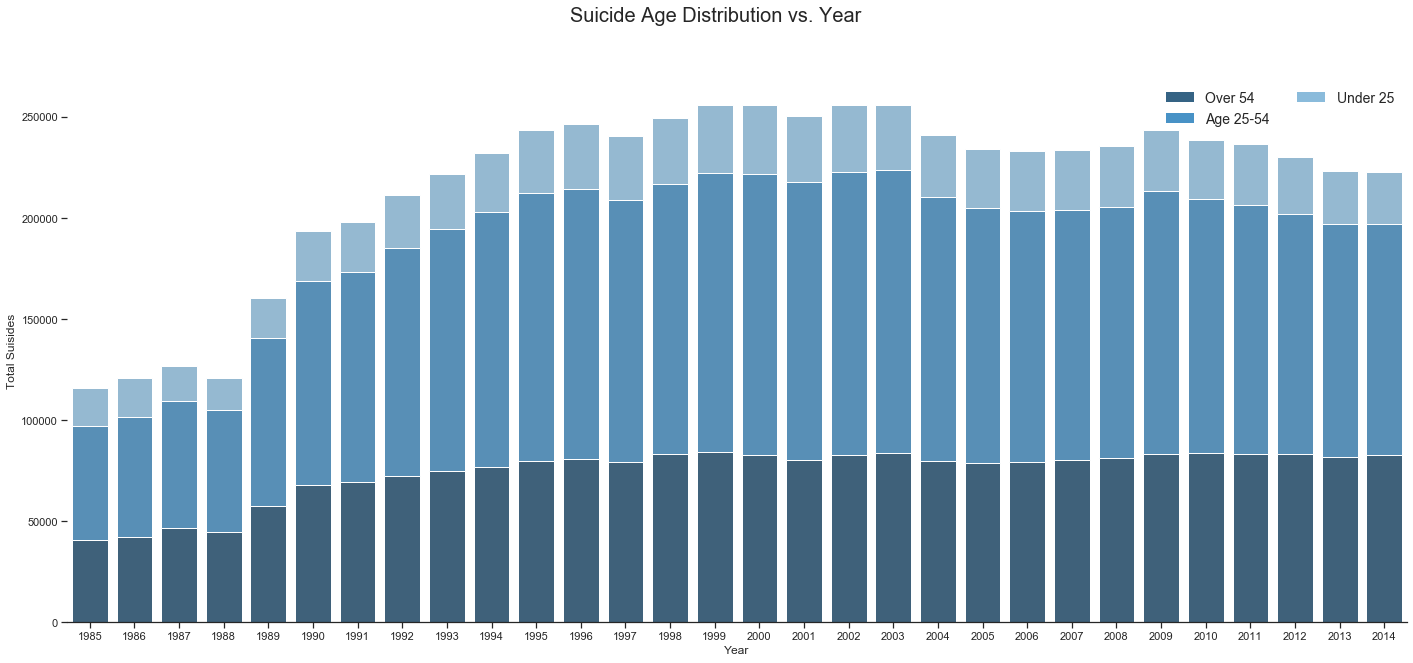

In [148]:
sns.set(style="ticks")
sns.set_context({"figure.figsize": (24, 10)})
colors = sns.color_palette("Blues_d")

#Plot 1 - background - "total" (all) series
sns.barplot(x = all_age['year'], y = all_age['suicides_no'], color=colors[5])

#Plot 2 - overlay - "middle" (adult + old) series
middle_plot = sns.barplot(x = adult_old['year'], y = adult_old['suicides_no'], color=colors[3])

#Plot 3 - overlay - "bottom" (old) series
bottom_plot = sns.barplot(x = old['year'], y = old['suicides_no'], color=colors[1])


topbar = plt.Rectangle((0, 0), 1, 1, fc=colors[5], edgecolor='none')
middlebar = plt.Rectangle((0, 0), 1, 1, fc=colors[3], edgecolor='none')
bottombar = plt.Rectangle((0, 0), 1, 1, fc=colors[1],  edgecolor='none')
l = plt.legend([bottombar, middlebar, topbar], ['Over 54', 'Age 25-54', 'Under 25'], loc=1, ncol=2, prop={'size':14})
l.draw_frame(False)

sns.despine(left=True)
bottom_plot.set_ylabel("Total Suisides")
bottom_plot.set_xlabel("Year")
plt.suptitle('Suicide Age Distribution vs. Year', fontsize=20)

Text(0.5, 0.98, 'Suicide Gender Distribution vs. Year')

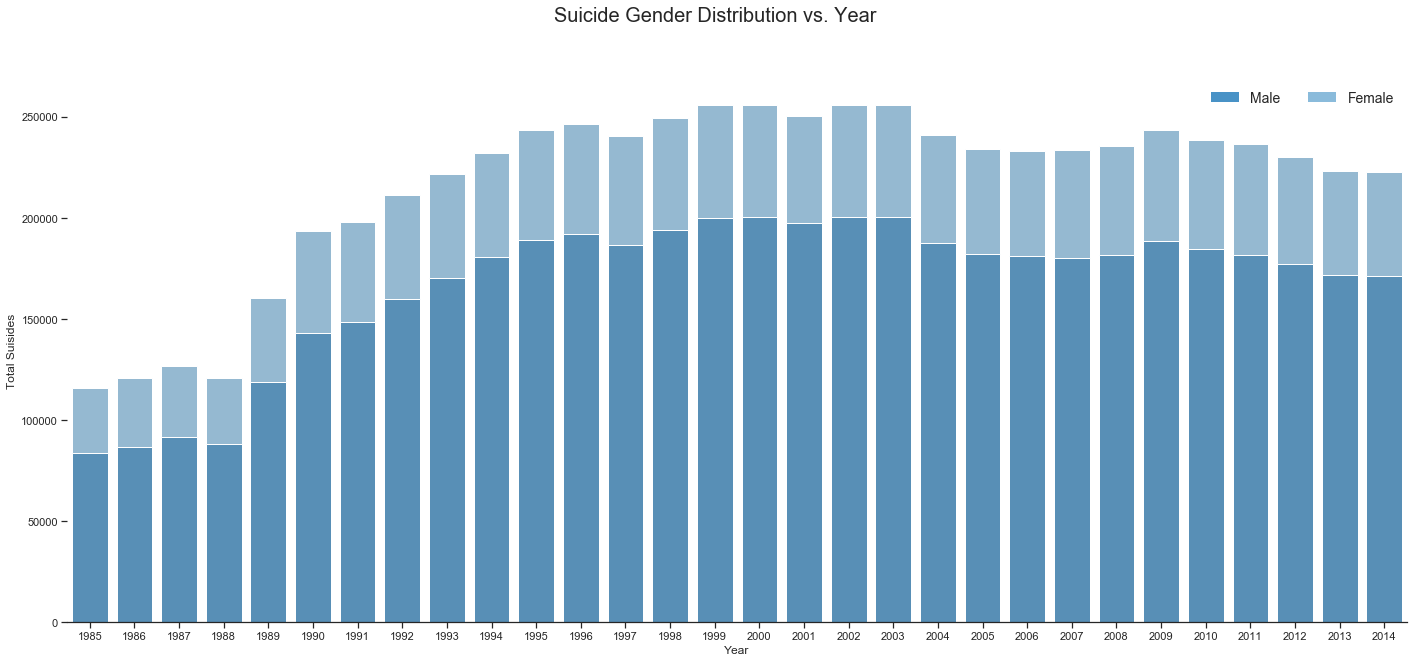

In [101]:
sns.set(style="ticks")
sns.set_context({"figure.figsize": (24, 10)})
colors = sns.color_palette("Blues_d")

#Plot 1 - background - "total" series
sns.barplot(x = df0['year'], y = df0['suicides_no'], color=colors[5])

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = df1[df1['sex']=='male']['year'], y = df1[df1['sex']=='male']['suicides_no'], color=colors[3])


topbar = plt.Rectangle((0, 0), 1, 1, fc=colors[5], edgecolor='none')
bottombar = plt.Rectangle((0, 0), 1, 1, fc=colors[3],  edgecolor='none')
l = plt.legend([bottombar, topbar], ['Male', 'Female'], loc=1, ncol = 2, prop={'size':14})
l.draw_frame(False)

sns.despine(left=True)
bottom_plot.set_ylabel("Total Suisides")
bottom_plot.set_xlabel("Year")
plt.suptitle('Suicide Gender Distribution vs. Year', fontsize=20)

#for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
#             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
#    item.set_fontsize(16)